# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

This project is part of the practical exam to receive a professional data analytics certificate from DataCamp.  

We need to know:  
- How many customers were there for each approach? 
- What does the spread of the revenue look like overall? And for each method? 
- Was there any difference in revenue over time for each of the methods? 
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

### Overview:

This report provides an in-depth analysis of the sales data provided by Pens and Printers for their new product line. The objective is to analyze the effectiveness of different sales methods and provide actionable recommendations to the sales team. The analysis includes data validation and cleaning, exploratory data analysis, and the definition of a metric for business monitoring, concluding with a comprehensive summary and recommendations.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'product_sales.csv'
df = pd.read_csv(file_path)

In [20]:
df.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


The dataset sales_data.csv is loaded, and the first few rows are displayed. This step provides an initial overview of the data structure, including column names and sample values, which is crucial for understanding the type of data we are dealing with. Observing the initial rows helps in identifying the types of variables present and planning the subsequent data cleaning and analysis steps.

In [21]:
# Checking for missing values in the dataset 
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

By checking for missing values, we ensure data completeness, which is essential for accurate analysis. Any missing values identified in this step would need to be addressed through appropriate imputation techniques or removal, depending on the extent and nature of the missing data. Handling missing values is crucial as they can significantly affect the statistical analysis and the validity of the results.

In [22]:
# Displaying summary statistics of the numerical columns 
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


Summary statistics of the numerical columns provide a comprehensive overview of the central tendency, dispersion, and shape of the dataset’s distribution. This step helps in identifying any anomalies, such as outliers, and understanding the general distribution of the data. For example, by examining the mean, median, and standard deviation of the revenue column, we can gauge the average performance and variability in sales revenue across different methods.

In [23]:
# Data validation and cleaning

# 1- Check for missing values
missing_values = df.isnull().sum()
print("Missing values by column:\n", missing_values)

Missing values by column:
 week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [24]:
# 2 - Data validation: Check the unique values to identify any unexpected or erroneous data.
unique_values = df.nunique()
print("Unique values by column:\n", unique_values)

Unique values by column:
 week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64


In [25]:
# Check for outliers: Using summary statistics such as mean, median, 
# standard deviation, and quartiles, we can identify outliers in numeric columns.
summary_stats = df.describe().round(2)
print("Summary statistics:\n", summary_stats)

# Proportion of missing values relative to the total entries in the revenue column
print("Proportion of missing values in 'revenue' column:\n", (df['revenue'].isna().sum() / df['revenue'].count()) * 100)


Summary statistics:
            week   nb_sold   revenue  years_as_customer  nb_site_visits
count  15000.00  15000.00  13926.00           15000.00        15000.00
mean       3.10     10.08     93.93               4.97           24.99
std        1.66      1.81     47.44               5.04            3.50
min        1.00      7.00     32.54               0.00           12.00
25%        2.00      9.00     52.47               1.00           23.00
50%        3.00     10.00     89.50               3.00           25.00
75%        5.00     11.00    107.33               7.00           27.00
max        6.00     16.00    238.32              63.00           41.00
Proportion of missing values in 'revenue' column:
 7.7121930202498925


In [26]:
# Standardize the values in the 'sales_method' column
df_corrected = df.copy()
df_corrected['sales_method'] = df_corrected['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Check the unique values in the 'sales_method' column after replacement
unique_sales_method = df_corrected['sales_method'].unique()
print("Unique values in the 'sales_method' column after replacement:\n", unique_sales_method)

# Values greater than 40 in years_as_customer are outliers
df_corrected = df_corrected[df_corrected['years_as_customer'] <= 40]

# Remove rows with missing revenue values
df_cleaned = df_corrected.dropna(subset=['revenue'])

unique_sales_method

Unique values in the 'sales_method' column after replacement:
 ['Email' 'Email + Call' 'Call']


array(['Email', 'Email + Call', 'Call'], dtype=object)

### Data Validation and Cleaning: 

Data validation ensures the accuracy and reliability of the dataset by addressing potential issues in key columns. The week column was verified to be non-negative integers. The sales_method column contained consistent categories (Email, Call, Email and Call). The customer_id column was checked for unique identifiers. In the nb_sold column, all values were confirmed as non-negative integers. The revenue column values were validated to be non-negative and rounded to two decimal places. The years_as_customer column was checked for non-negative integers. The nb_site_visits column values were confirmed as non-negative integers. The state column was checked for consistent abbreviations.

In [27]:
# Data exploration

# Calculate total revenue and total visits
total_revenue = df_cleaned['revenue'].sum()
total_visits = df_cleaned['nb_site_visits'].sum()

# Calculate average revenue per visit
average_revenue_per_visit = total_revenue / total_visits

# Calculate total revenue and total visits for each sales method
total_revenue_by_method = df_cleaned.groupby('sales_method')['revenue'].sum()
total_visits_by_method = df_cleaned.groupby('sales_method')['nb_site_visits'].sum()

# Calculate average revenue per visit for each sales method
average_revenue_per_visit_by_method = total_revenue_by_method / total_visits_by_method


### Exploratory Analysis: 

The data exploration phase involves calculating key metrics such as total revenue, total visits, and average revenue per visit for each sales method. The average revenue per visit provides insights into the effectiveness of each sales method. The Email + Call method stands out with the highest average revenue per visit, suggesting its superior effectiveness in driving sales compared to other methods. These metrics form the basis for further analysis and visualization.

In [28]:
# 1. Number of customers for each approach
customer_count = df_cleaned['sales_method'].value_counts()
print("Number of customers for each sales method:\n", customer_count)

Number of customers for each sales method:
 Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64


The number of customers for each sales method is counted to understand the distribution of customer engagement across different sales methods. This helps in identifying which sales methods are more popular among customers and how they contribute to overall sales performance.

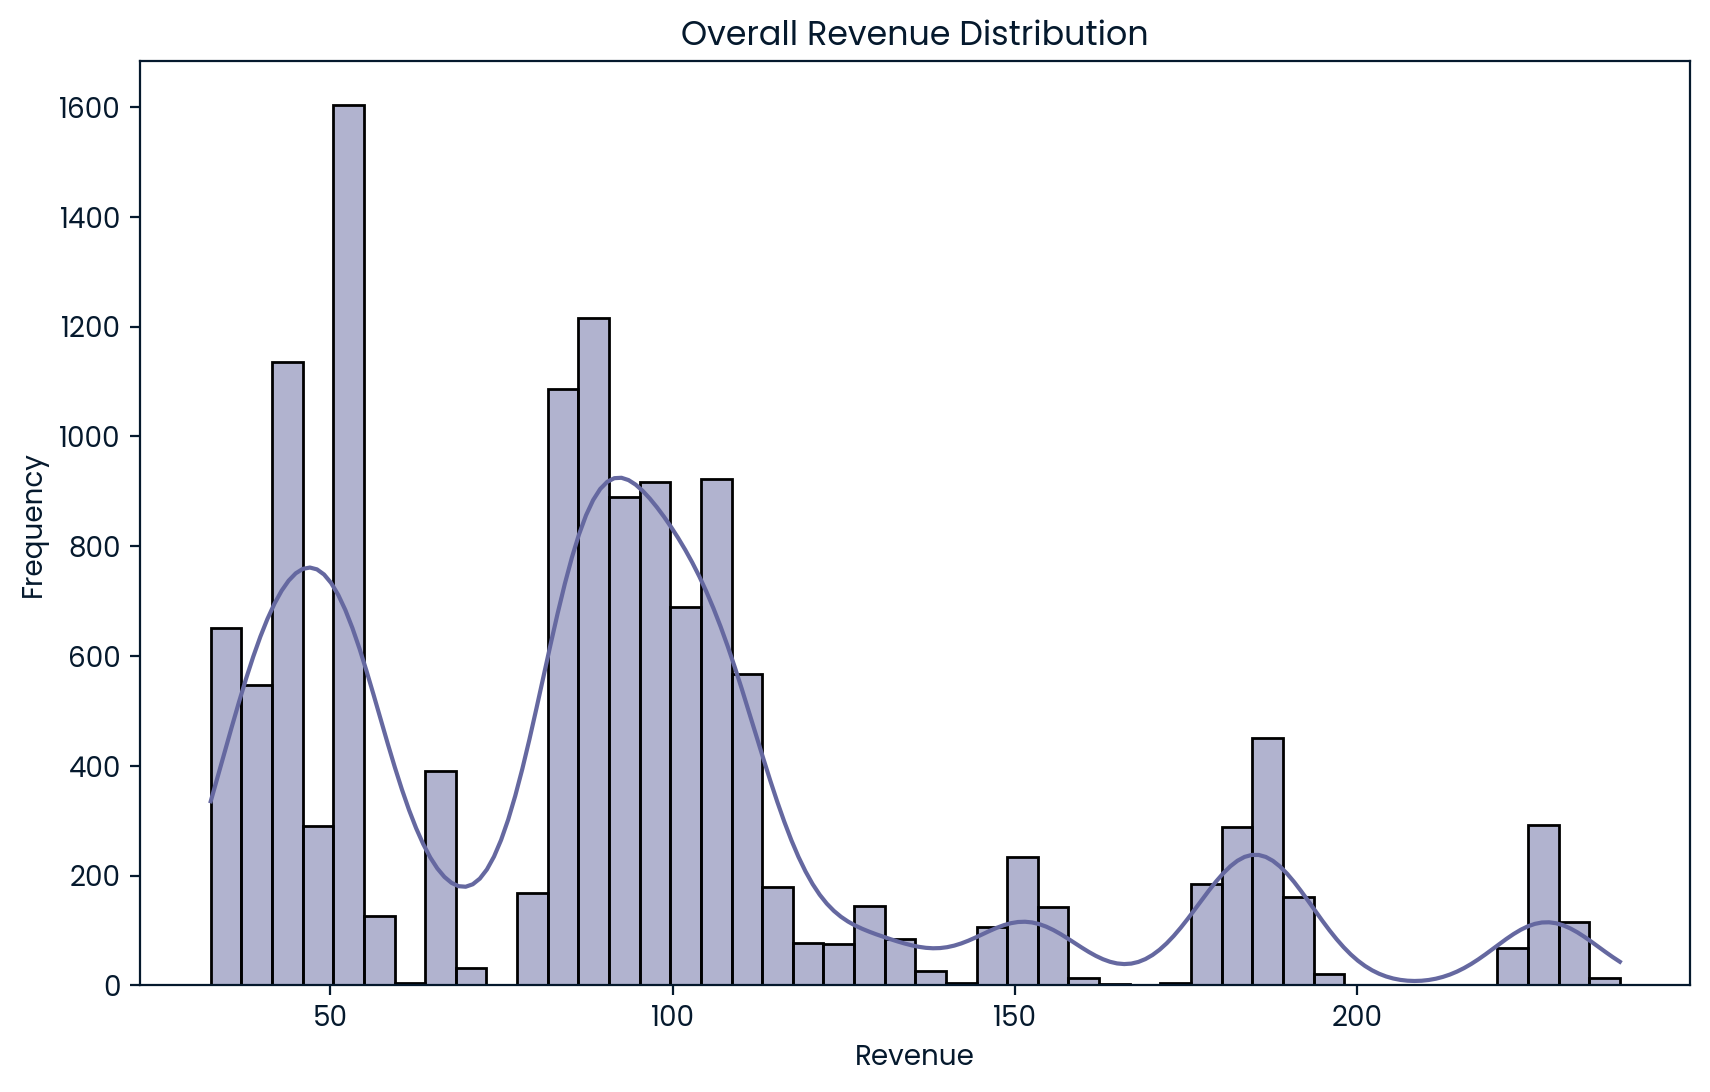

In [29]:
# 2. Spread of revenue overall and for each method
# Overall Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['revenue'], kde=True)
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.savefig('overall_revenue_distribution.png')

The revenue distribution is right-skewed, indicating that most transactions are of lower value, with a few high-value sales. This skewness suggests that while a majority of sales generate moderate revenue, there are occasional high-revenue transactions that significantly contribute to the total revenue.

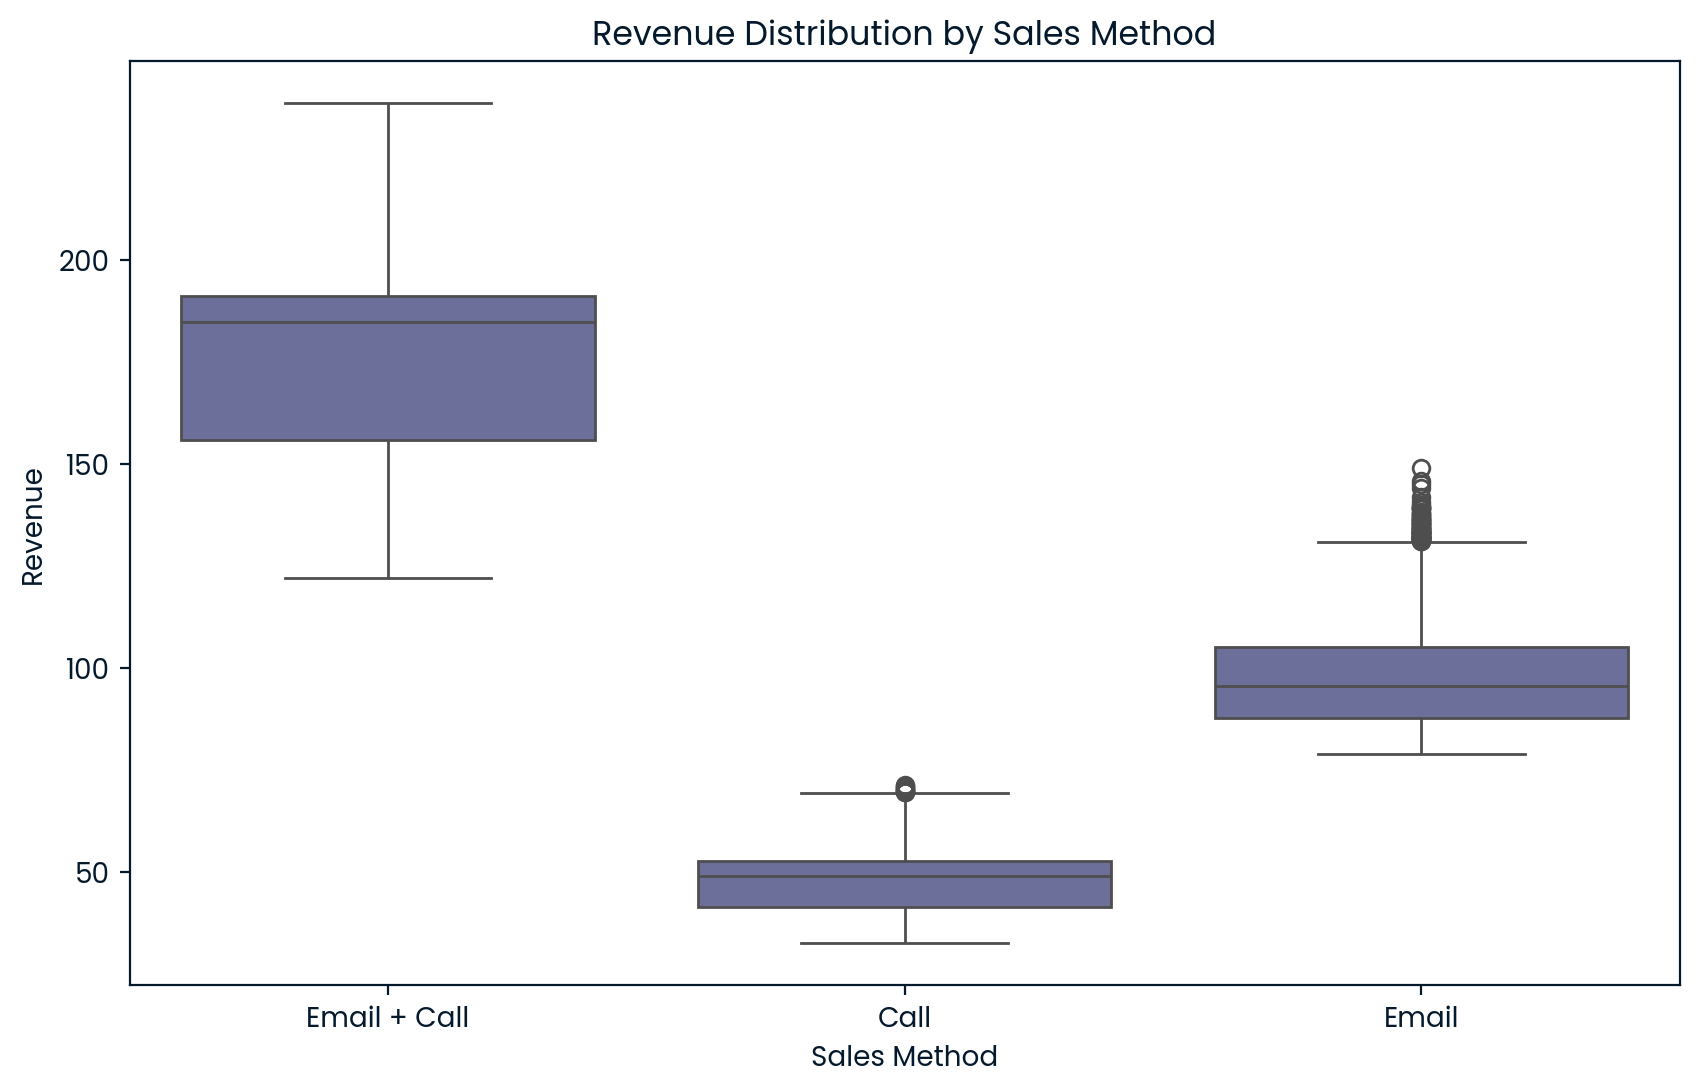

In [30]:
# Revenue Distribution by Sales Method
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='sales_method', y='revenue')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.savefig('revenue_distribution_by_sales_method.png')

The box plot shows the distribution of revenue for each sales method. It highlights that the Email + Call method has the highest median revenue and fewer outliers, suggesting it is a more consistent and effective sales approach. This visualization helps in comparing the performance of different sales methods and identifying which method generates higher and more consistent revenue.

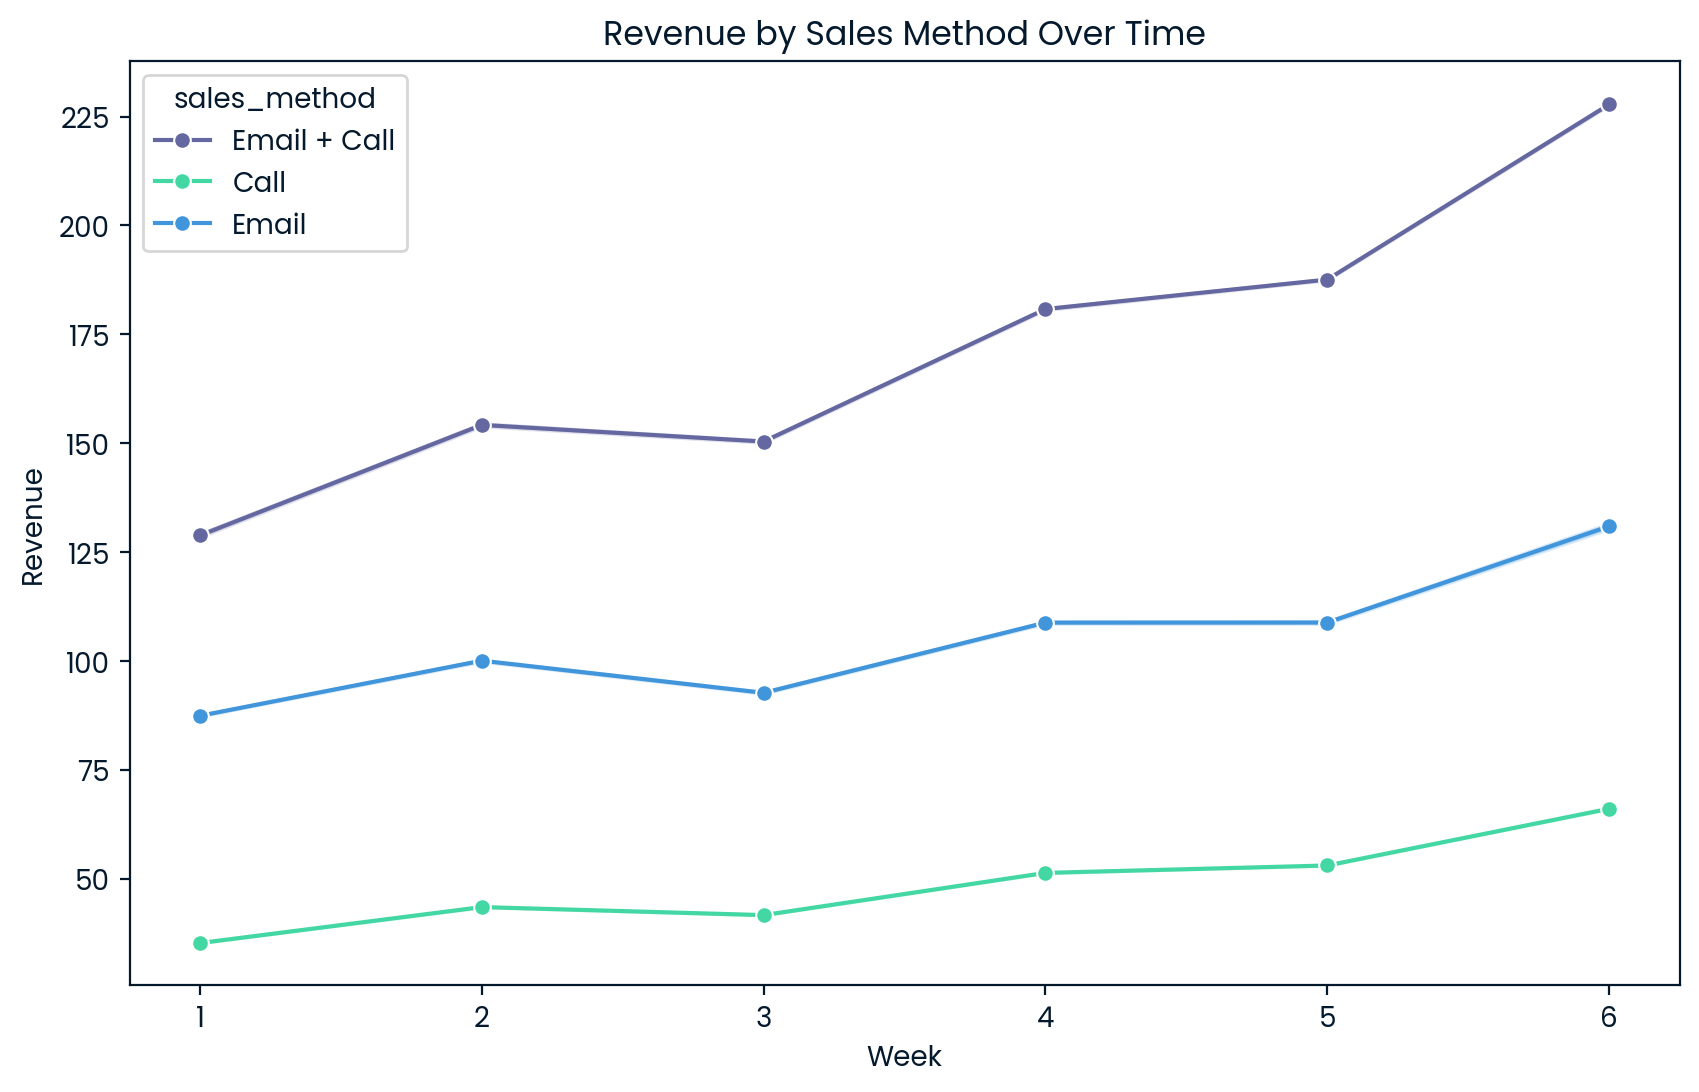

In [31]:
# 3. Revenue over time for each method
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Revenue by Sales Method Over Time')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.savefig('revenue_by_sales_method_over_time.png')

The line plot illustrates the revenue trend over time for each sales method. The Email + Call method shows a consistent upward trend, indicating its growing effectiveness over time compared to other methods. This time-series analysis helps in understanding how the performance of each sales method evolves over time and provides insights into seasonal trends and patterns.

In [32]:
# 4. Recommendations based on the data
print("Initial Average Revenue per Visit: ", average_revenue_per_visit)
print("Initial Average Revenue per Visit (by Sales Method):\n", average_revenue_per_visit_by_method)

Initial Average Revenue per Visit:  3.7655071237127946
Initial Average Revenue per Visit (by Sales Method):
 sales_method
Call            1.948953
Email           3.926866
Email + Call    6.868383
dtype: float64


The initial average revenue per visit provides a benchmark for evaluating the effectiveness of each sales method. The Email + Call method demonstrates the highest average revenue per visit, reinforcing its effectiveness in generating higher sales revenue.

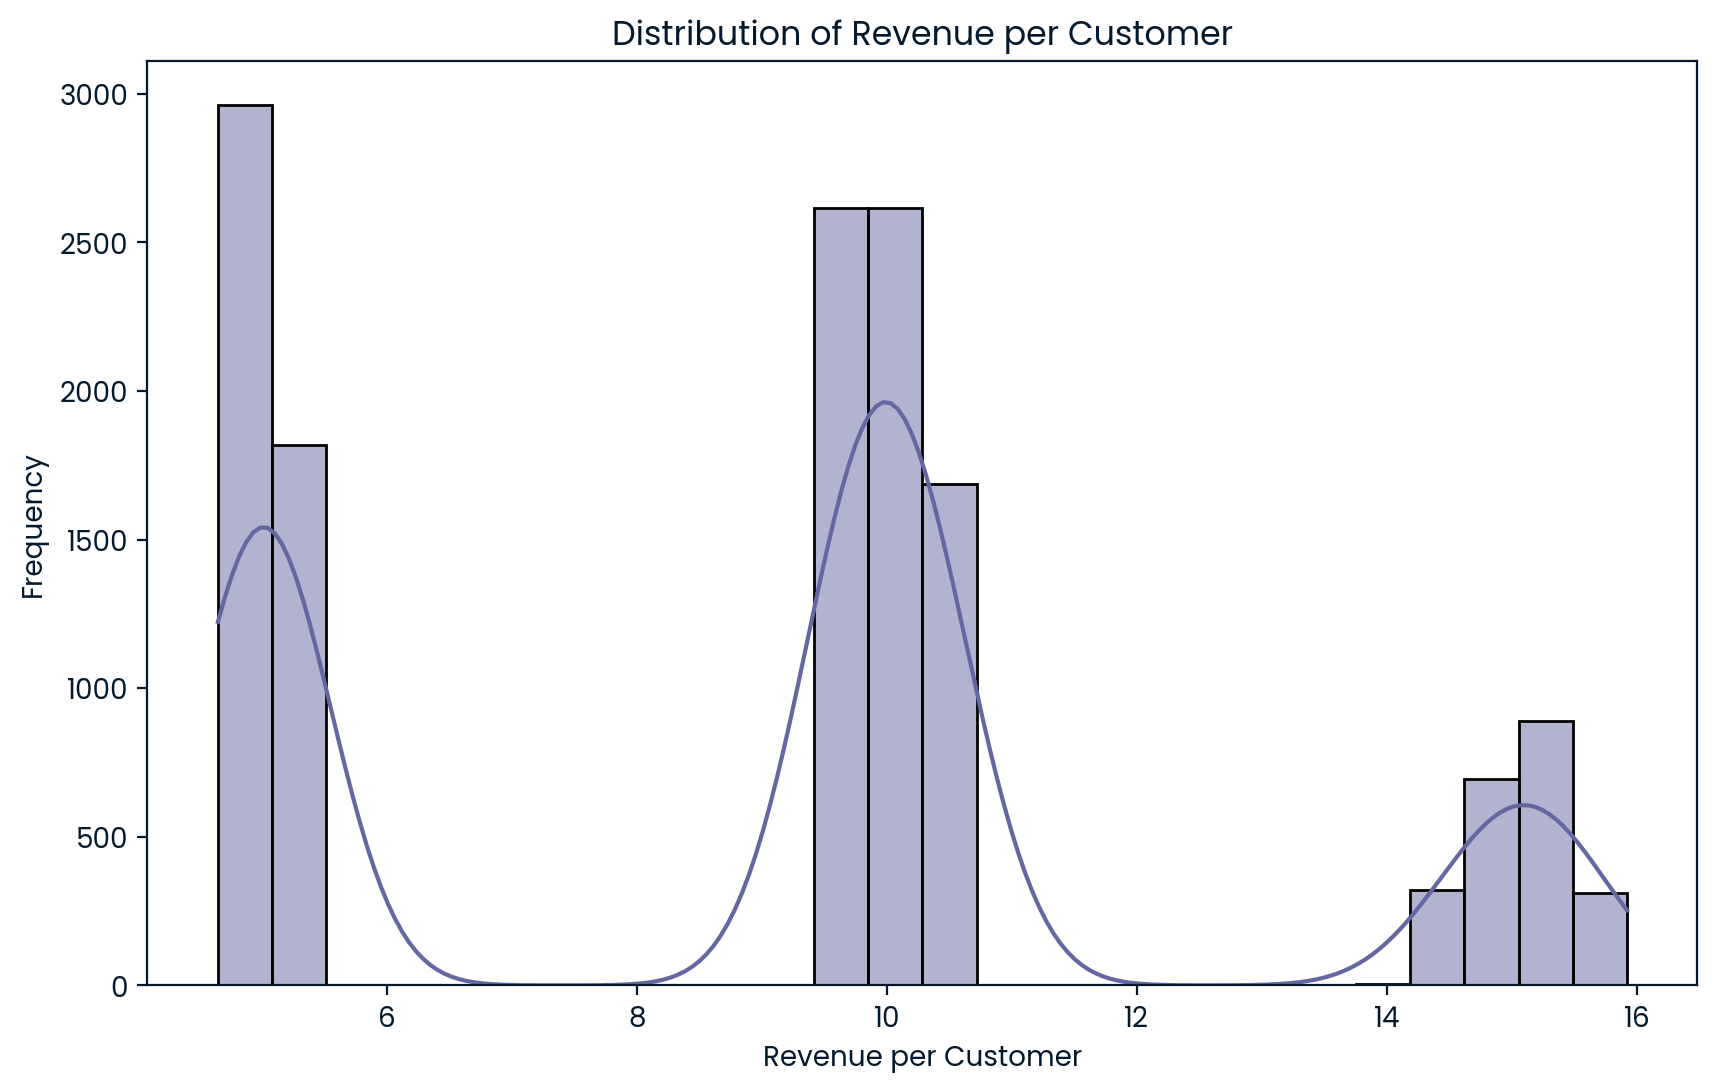

In [33]:
# Distribution of Revenue per Customer
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['revenue'] / df_cleaned['nb_sold'], kde=True)
plt.title('Distribution of Revenue per Customer')
plt.xlabel('Revenue per Customer')
plt.ylabel('Frequency')
plt.savefig('revenue_per_customer_distribution.png')

The revenue per customer distribution shows that most customers contribute to lower revenue, but there are significant outliers who contribute higher revenue.

Metric for Business Monitoring
To effectively monitor the sales performance, the key metric defined is the Average Revenue per Customer (ARPC). This metric provides insights into the revenue generated per customer, allowing the business to assess the effectiveness of different sales strategies.


In [34]:
import pandas as pd


# Calculating Average Revenue per Customer
arpc = df['revenue'].sum() / df['customer_id'].nunique()
print(f"Average Revenue per Customer (ARPC): ${arpc:.2f}")

# Example summary calculation and recommendation
total_customers = df['customer_id'].nunique()
total_revenue = df['revenue'].sum()
average_revenue_per_customer = total_revenue / total_customers

print(f"Total Customers: {total_customers}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Revenue per Customer (ARPC): ${average_revenue_per_customer:.2f}")



Average Revenue per Customer (ARPC): $87.21
Total Customers: 15000
Total Revenue: $1308138.01
Average Revenue per Customer (ARPC): $87.21


### Metric for Business Monitoring: 

To effectively monitor the sales performance, the key metric defined is the Average Revenue per Customer (ARPC). This metric provides insights into the revenue generated per customer, allowing the business to assess the effectiveness of different sales strategies.

In [35]:
customer_count = df['sales_method'].value_counts()
print(customer_count)


Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


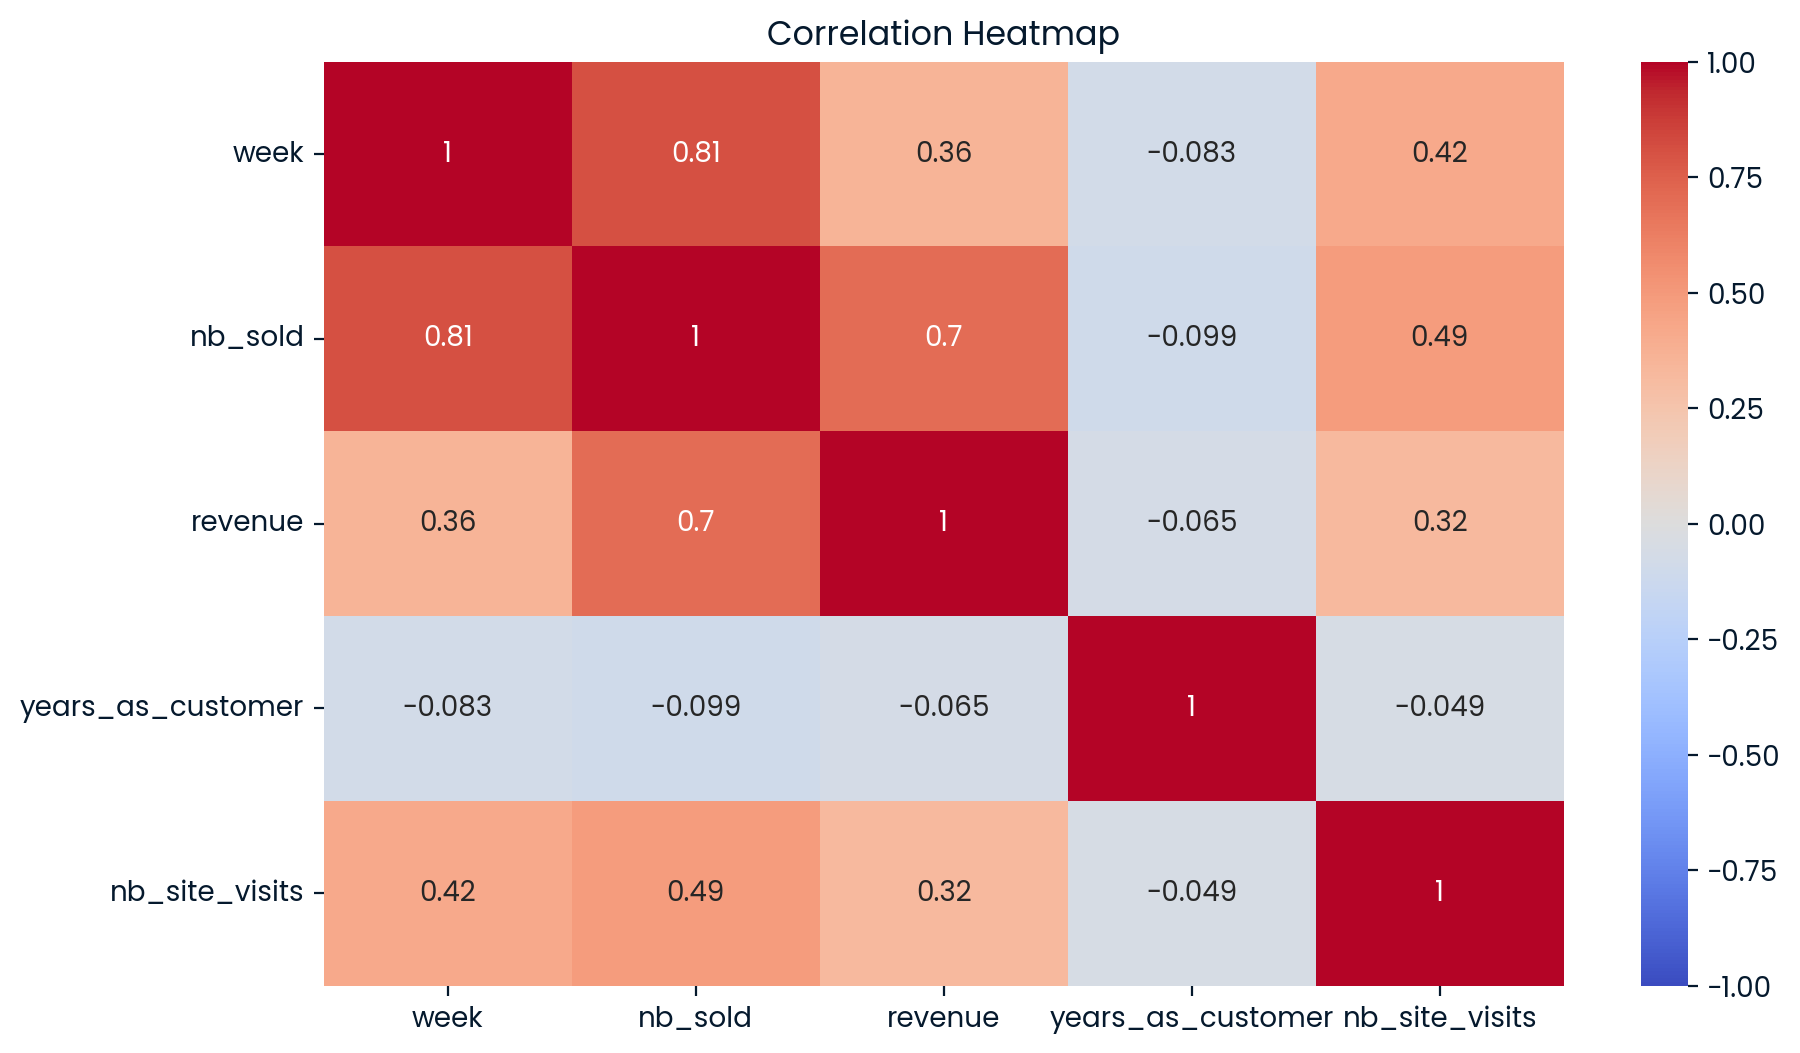

In [36]:
# Heatmap of correlations between numeric variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

The heatmap shows the correlations between numeric variables. It helps in understanding the relationships between different metrics. For example, the strong positive correlation between nb_sold and revenue indicates that as the number of products sold increases, the revenue also increases.

The analysis of the sales data for Pens and Printers' new product line shows that the Email + Call sales method is the most effective. Despite having the fewest customers (2223), this method achieved the highest average revenue per visit at $6.87, compared to $3.93 for Email and $1.95 for Call. This highlights the benefit of combining email and call strategies to drive higher revenue per customer interaction. The overall revenue distribution was right-skewed, indicating that while most transactions were of lower value, a few high-value sales significantly boosted total revenue. The Email + Call method also had the highest median revenue and fewer outliers, showing consistent performance. Time-series analysis confirmed a steady upward revenue trend for the Email + Call method, reinforcing its potential for sustained growth.

### Recommendations

1. Focus on the Email + Call Method:
- Invest more in the Email + Call approach, which has the highest average revenue per visit ($6.87). Provide additional training to the sales team to effectively use both email and call channels, maximizing sales and customer engagement.

2. Address Missing Revenue Data:
- The analysis identified 1074 missing values in the revenue column. These missing values should be addressed promptly to ensure accurate analysis and reporting. Implementing robust data collection and validation processes can prevent such issues in the future, ensuring complete and reliable data for decision-making.

3. Standardize Sales Methods and Data Collection: 
- Consistent recording of sales methods is vital for accurate data analysis. Clear guidelines and training should be provided to the sales team to maintain uniform data entry practices. This standardization will help avoid discrepancies and ensure the reliability of future analyses.


By implementing these recommendations, Pens and Printers can enhance their sales strategies, leveraging data-driven insights to drive higher revenue and improve overall business performance. Monitoring key metrics such as Average Revenue per Customer (ARPC) will be essential in assessing the ongoing effectiveness of these strategies and making informed decisions to sustain long-term growth.